In [3]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv("Telecom_customer churn.csv")

In [5]:
df_20 = df[["churn","eqpdays","refurb_new","months","mou_Mean","totcalls","ovrmou_Mean","hnd_webcap","lor","hnd_price", \
            "totmrc_Mean","avgrev","change_mou","uniqsubs","ethnic","ovrrev_Mean","avg3qty","crclscod","asl_flag", \
            "avgmou","avg3mou","mou_cvce_Mean","vceovr_Mean","iwylis_vce_Mean","actvsubs"]]
df_20[:5]

,churn,eqpdays,refurb_new,months,mou_Mean,totcalls,ovrmou_Mean,hnd_webcap,lor,hnd_price,...,ovrrev_Mean,avg3qty,crclscod,asl_flag,avgmou,avg3mou,mou_cvce_Mean,vceovr_Mean,iwylis_vce_Mean,actvsubs
0,1,361.0,N,61,219.25,1652,0.00,WCMB,15.0,149.98999,...,0.0,116,A,N,83.37,272,90.643333,0.0,0.000000,1
1,0,240.0,N,56,482.75,14654,22.75,WC,1.0,NaN,...,9.1,158,EA,N,479.40,305,189.396667,9.1,6.333333,1
2,1,1504.0,N,58,10.25,7903,0.00,NaN,7.0,29.98999,...,0.0,7,C,N,433.98,12,5.426667,0.0,0.000000,1
3,0,1812.0,N,60,7.50,1502,0.00,NaN,6.0,29.98999,...,0.0,3,B,N,63.23,8,8.410000,0.0,0.000000,1
4,0,434.0,N,57,570.50,4485,0.00,WCMB,5.0,149.98999,...,0.0,191,A,N,249.38,558,285.233333,0.0,0.666667,1


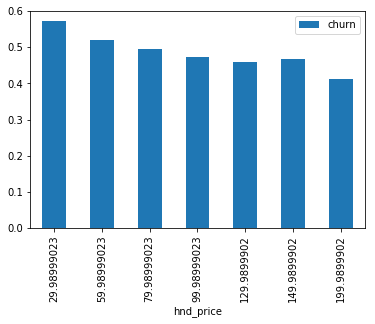

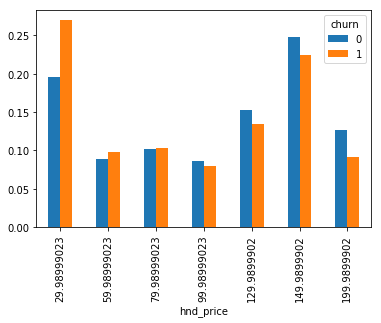

In [19]:
#first good graph
df_pop_hnd = df_20[df_20.groupby('hnd_price')['hnd_price'].transform('size') > 5000]
df_churn = df_pop_hnd.groupby("hnd_price")[["churn"]].mean()
df_churn.plot.bar()

#Let us normalize each column so that we can compare columns.
pop_hnd_crosstab = pd.crosstab(df_pop_hnd["hnd_price"], df_pop_hnd["churn"])
total_churn = pop_hnd_crosstab.apply(sum)
pop_hnd_crosstab /= total_churn
pop_hnd_crosstab.plot(kind='bar')

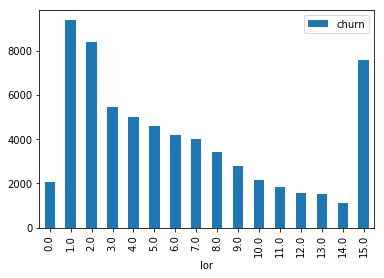

In [22]:
df_churn = df_pop_hnd.groupby("lor")[["churn"]].count()
df_churn.plot.bar()

In [42]:
df_20['lor_binned'] = pd.cut(df_20['lor'], 4)
print df['lor_binned'][:5]

0      (9.0, 15.0]
1    (-0.001, 2.0]
2       (5.0, 9.0]
3       (5.0, 9.0]
4       (2.0, 5.0]
Name: lor_binned, dtype: category
Categories (4, interval[float64]): [(-0.001, 2.0] < (2.0, 5.0] < (5.0, 9.0] < (9.0, 15.0]]


C:\Users\tsblo\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


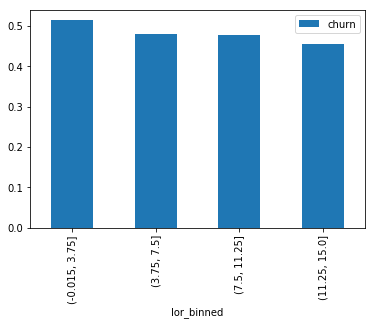

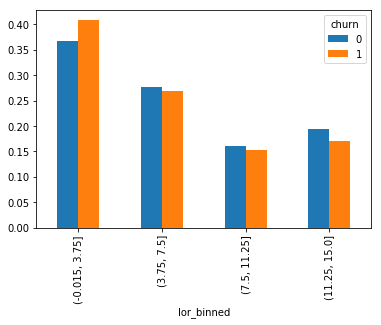

In [43]:
df_churn = df_20.groupby("lor_binned")[["churn"]].mean()
df_churn.plot.bar()

#Let us normalize each column so that we can compare columns.
lor_crosstab = pd.crosstab(df_20["lor_binned"].sort_values(), df_20["churn"])
total_churn = lor_crosstab.apply(sum)
lor_crosstab /= total_churn
lor_crosstab.plot(kind='bar')

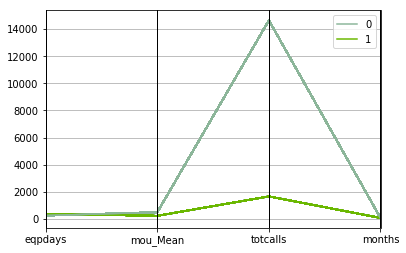

In [47]:
from pandas.plotting import parallel_coordinates

f = (
    df_20[["churn", "eqpdays", "mou_Mean", "totcalls", "months"]]
        .loc[df_20['churn']]
        .applymap(lambda v: int(v))
        .dropna()
)
f['churn'] = df_20['churn']
f = f.sample(200)

parallel_coordinates(f, 'churn')

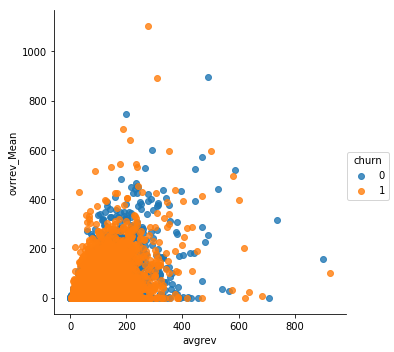

In [51]:
import seaborn as sns
sns.lmplot("avgrev", "ovrrev_Mean", data = df_20, hue="churn", fit_reg=False);

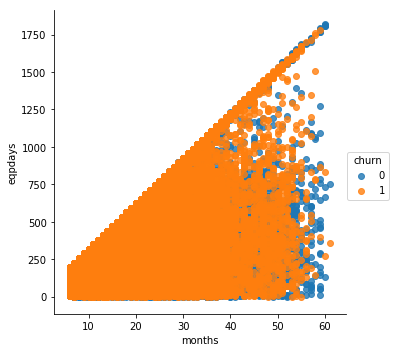

In [52]:
sns.lmplot("months", "eqpdays", data = df_20, hue="churn", fit_reg=False);

In [6]:
df_churn = df_20.groupby(["months", "eqpdays"])[["churn"]].mean()
df_churn[:5]

churn
months eqpdays          
6      2.0      0.666667
       3.0      0.400000
       4.0      0.500000
       5.0      0.500000
       6.0      0.500000